In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Section 1

## Project 1: Kinematic model of a gantry crane

### December 2023

### Noah Clark and Thomas Bourget

# Section 2

Continuous-time equation:<br>
$x_{1} = x$ (Position of the cart/trolley)<br>
$x_{2} = \dot{x}$ (Velocity of the cart/trolley)<br>
$x_{3} = \theta$ (Angular position/deviation of the load)<br>
$x_{4} = \dot{\theta}$ (Angular velocity of the load)<br>
$x_{5} = L$ (Length of the cable)<br>
$u_{1} = \ddot{x}$ (First input: acceleration of the cart)<br>
$u_{2} = \dot{L}$ (Second input: rate of change of the length of the cable)<br>

Discrete-time equivalent:<br>
$\dot{x}_{k+1} = x_{2k} \Delta t + x_{k}$<br>
$\dot{x}_{2k+1} = u_{1}\Delta t+ x_{2k}$<br>
$\dot{x}_{3k+1} = x_{4k} \Delta t + x_{3k}$<br>
$\dot{x}_{4k+1} = 1/x_{5k}(-g\sin(x_{3k}) - \cos(x_{3k})u_{1} - 2x_{4k}u_{2}) \Delta t + x_{4k}$<br>
$\dot{x}_{5k+1} = u_{2}\Delta t + x_{5k}$<br>

# Section 3

Implementation of the dynamic model (the function/solver used for implementing the equations)

In [2]:
#import the matplotlib module for plotting the results
import matplotlib.pyplot as plt
import math

def crane(x_1, x_2, x_3, x_4, x_5, u_1, u_2, t_f, dt):
    # Show inputs
    print("x_1 :", x_1)
    print("x_2:", x_2)
    print("x_3:", x_3)
    print("x_4:", x_4)
    print("x_5:", x_5)
    print("Input 1:", u_1)
    print("Input 2:", u_2)
    print("Simulation length:", t_f, "seconds")
    print("Delta t: ", dt)
    # setting up the numerical solution parameters
    x_1 = x_1 # meters
    x_2 = x_2 # m/s
    x_3 = x_3 # radians
    x_4 = x_4 # radians/s
    x_5 = x_5 # meters
    u_1 = u_1 # m/s^2 (keep accelerating the cart)
    u_2 = u_2 # meters(keep extending the length of the cable)
    g = 9.8 # m/s^2
    t_0 = 0 # seconds
    t_f = t_f # seconds
    dt = dt # delta t 
    # initialize the independent and dependent variable lists
    time_values = [t_0]
    # initialize the list for x_1-x_5
    x_1_values = [x_1]
    x_2_values = [x_2]
    x_3_values = [x_3]
    x_4_values = [x_4]
    x_5_values = [x_5]
    # initialize the solver
    x_1k = x_1
    x_2k = x_2
    x_3k = x_3
    x_4k = x_4
    x_5k = x_5
    t = t_0
    # simulate the dynamics
    while t < t_f:
        # update the states x_1{k+1}
        x_1k1 = x_2k * dt + x_1k
        # update the states x_2{k+1}
        x_2k1 = u_1 * dt + x_2k
        # update the states x_3{k+1}
        x_3k1 = x_4k * dt + x_3k
        # update the states x_4{k+1}
        x_4k1 = (dt/x_5k) * (-g * math.sin(x_3k) - math.cos(x_3k) * u_1 - (2 * x_4k * u_2)) + x_4k
        # update the states x_5{k+1}
        x_5k1 = u_2 * dt + x_5k
        # update the simulation time stamp
        t += dt
        # update the lists
        x_1_values.append(x_1k1)
        x_2_values.append(x_2k1)
        x_3_values.append(x_3k1)
        x_4_values.append(x_4k1)
        x_5_values.append(x_5k1)
        time_values.append(t)
        # set up the loop for the next iteration
        x_1k = x_1k1
        x_2k = x_2k1
        x_3k = x_3k1
        x_4k = x_4k1
        x_5k = x_5k1
    # create some subplots and display the results
    fig, axs = plt.subplots(5, 1, figsize = (7,10), constrained_layout = True)

    axs[0].plot(time_values, x_1_values)
    axs[0].set_xlabel('time (seconds)')
    axs[0].set_ylabel('x_1 (m)')
    axs[1].plot(time_values, x_2_values)
    axs[1].set_xlabel('time (seconds)')
    axs[1].set_ylabel('x_2 (m/s)')
    axs[2].plot(time_values, x_3_values)
    axs[2].set_xlabel('time (seconds)')
    axs[2].set_ylabel('x_3 (rads)')
    axs[3].plot(time_values, x_4_values)
    axs[3].set_xlabel('time (seconds)')
    axs[3].set_ylabel('x_4 (rads/s)')
    axs[4].plot(time_values, x_5_values)
    axs[4].set_xlabel('time (seconds)')
    axs[4].set_ylabel('x_5 (m)')

# Section 4

Tests for different inputs & initial conditions (plots go here). Make sure the inputs that you use make physical sense. Do not randomly try the system based on different inputs.

x_1 : 0
x_2: 0
x_3: 0
x_4: 0
x_5: 1
Input 1: 0.05
Input 2: 0.5
Simulation length: 15 seconds
Delta t:  0.5


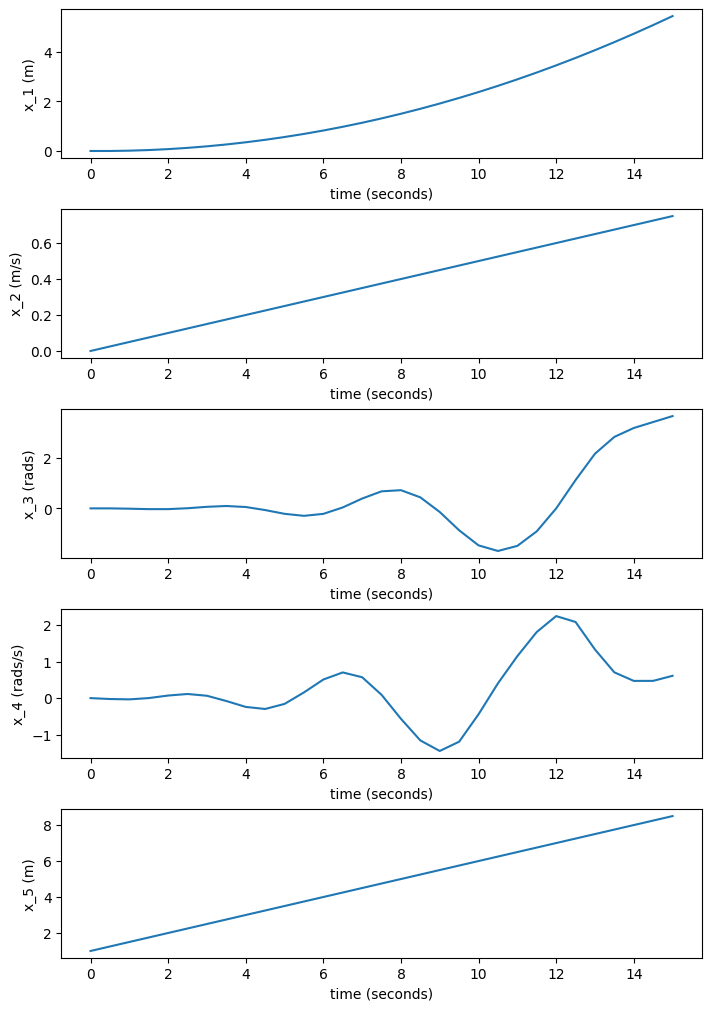

In [3]:
crane(0, 0, 0, 0, 1, .05, .5, 15, .5)

x_1 : 0
x_2: 1
x_3: 0
x_4: 0
x_5: 1
Input 1: 0.05
Input 2: 0.5
Simulation length: 15 seconds
Delta t:  0.5


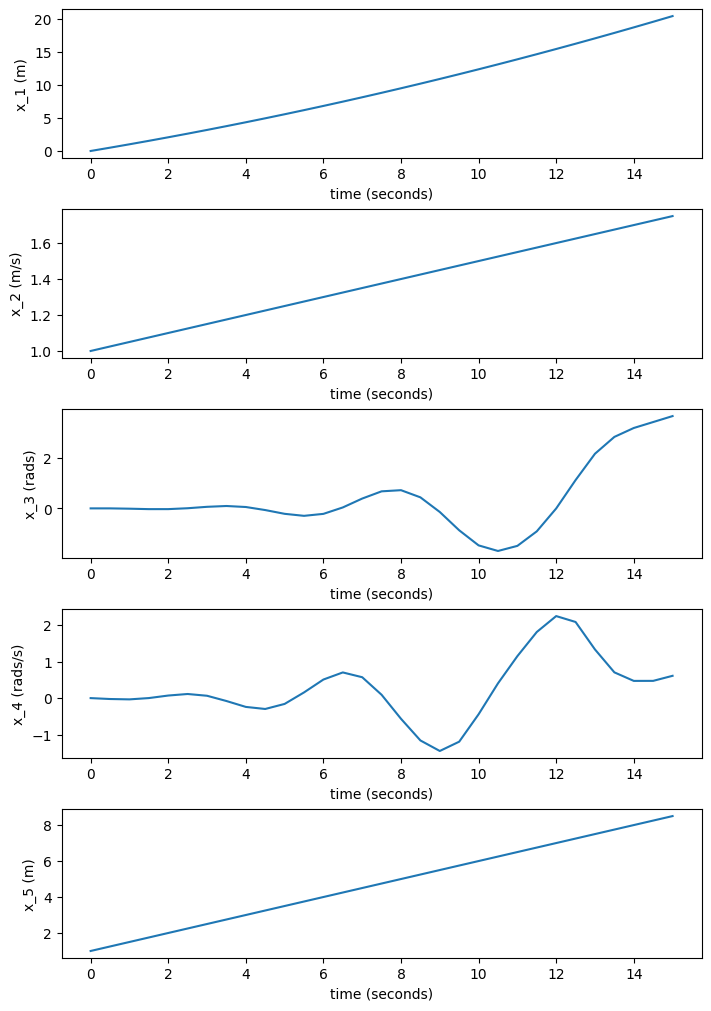

In [4]:
crane(0, 1, 0, 0, 1, .05, .5, 15, .5)

Changing the initial velocity of the cart effects how far the cart goes over the duration, but doesn't have much of an effect on the angular position or angular velocity. 

x_1 : 0
x_2: 0
x_3: -0.05
x_4: 0
x_5: 1
Input 1: 0.05
Input 2: 0.5
Simulation length: 15 seconds
Delta t:  0.5


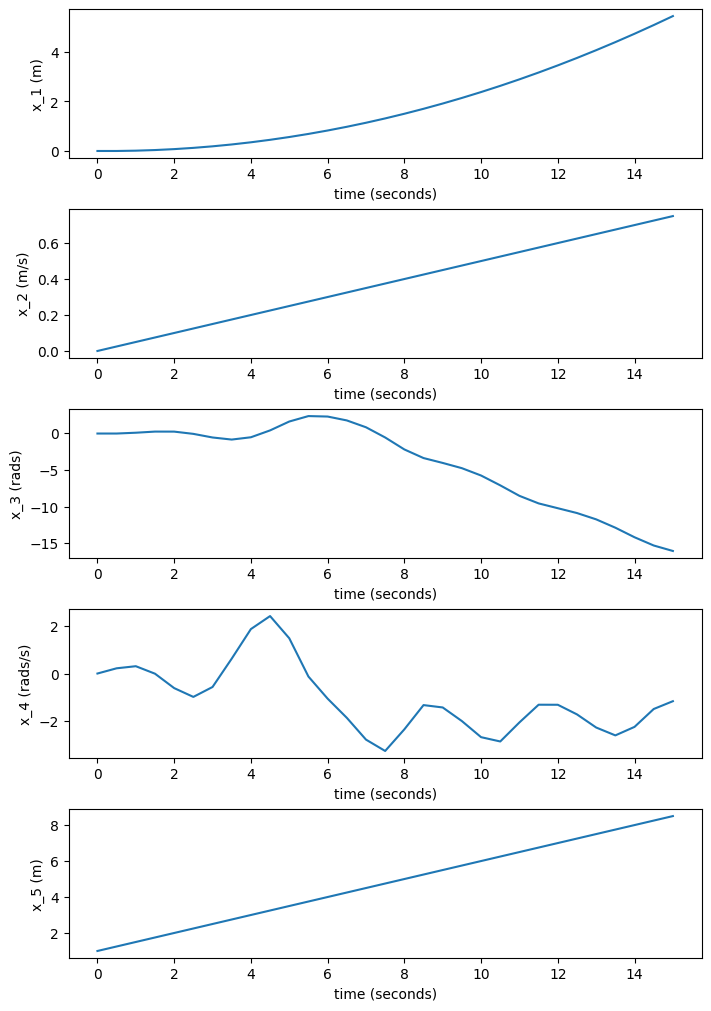

In [5]:
crane(0, 0, -.05, 0, 1, .05, .5, 15, .5)

Changing the starting angular position by even a small amount has a large effect on the angular position, making it swing a lot furthur than it does when its starting position is 0.

x_1 : 0
x_2: 0
x_3: 0
x_4: 0.1
x_5: 1
Input 1: 0.05
Input 2: 0.5
Simulation length: 15 seconds
Delta t:  0.5


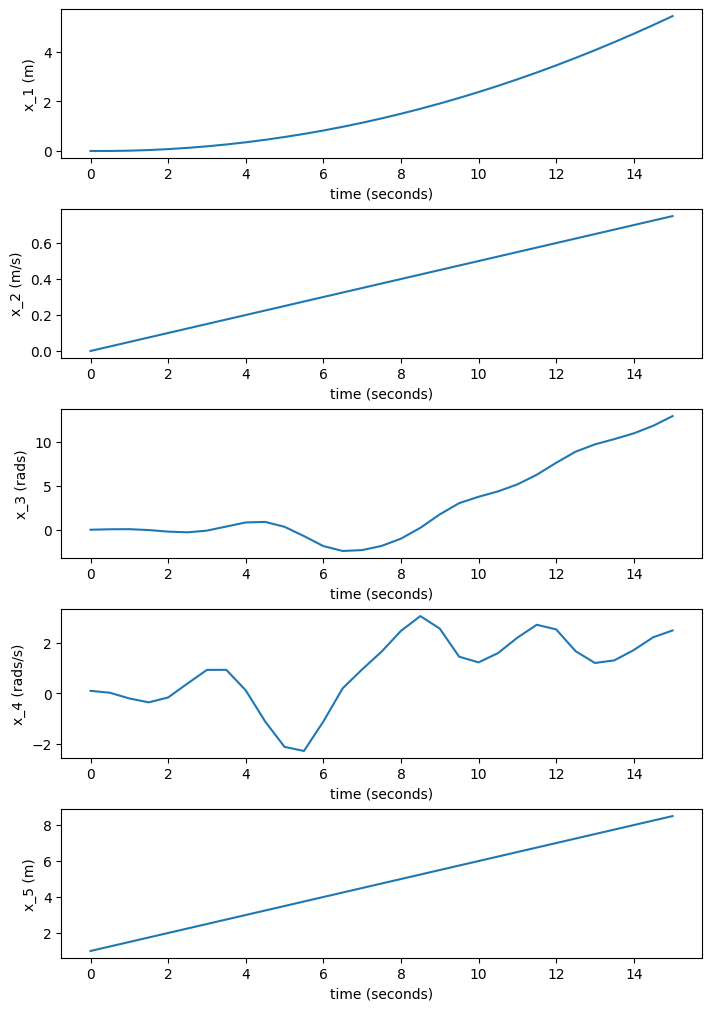

In [6]:
crane(0, 0, 0, .1, 1, .05, .5, 15, .5)

Changing the starting angular velocity has a similar effect to changing the starting angular position. The crane has much greater swings than when the initial start is at 0.

x_1 : 0
x_2: 0
x_3: 0
x_4: 0
x_5: 0.01
Input 1: 0.05
Input 2: 0.5
Simulation length: 15 seconds
Delta t:  0.5


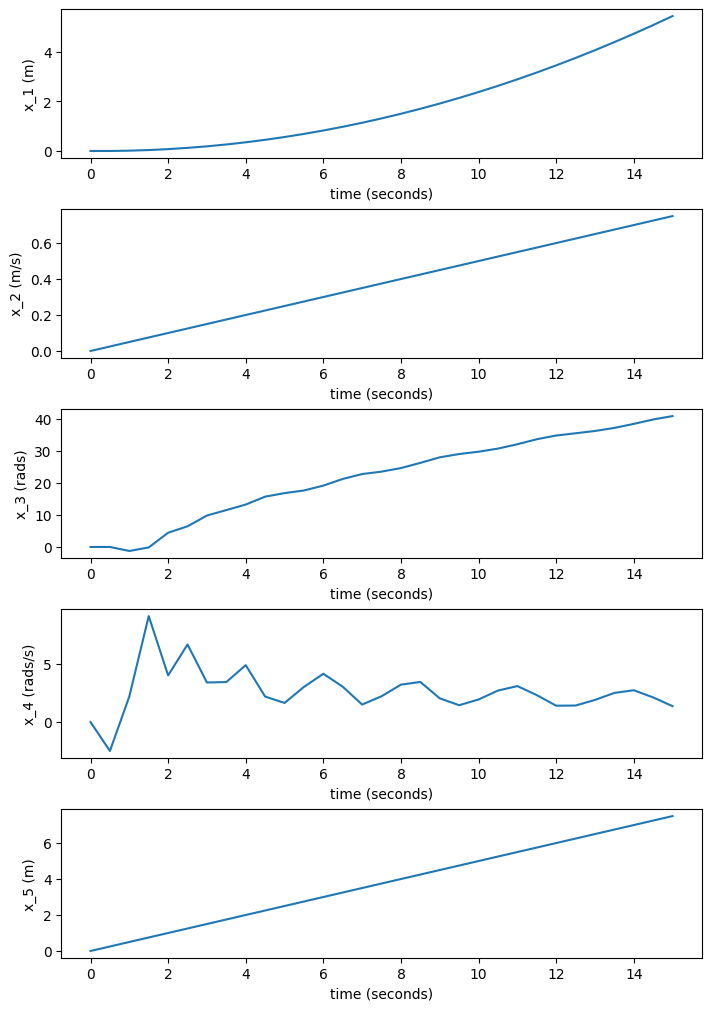

In [7]:
crane(0, 0, 0, 0, .01, .05, .5, 15, .5)

When the length of the cable is less than 1, the angular velocity gets higher. If the length of the cable starts at something very small like .01, it ends up swinging very fast at the beginning of the system and creates an angular position that continues to increase.

x_1 : 0
x_2: 0
x_3: 0
x_4: 0
x_5: 1
Input 1: 0.3
Input 2: 0.5
Simulation length: 15 seconds
Delta t:  0.5


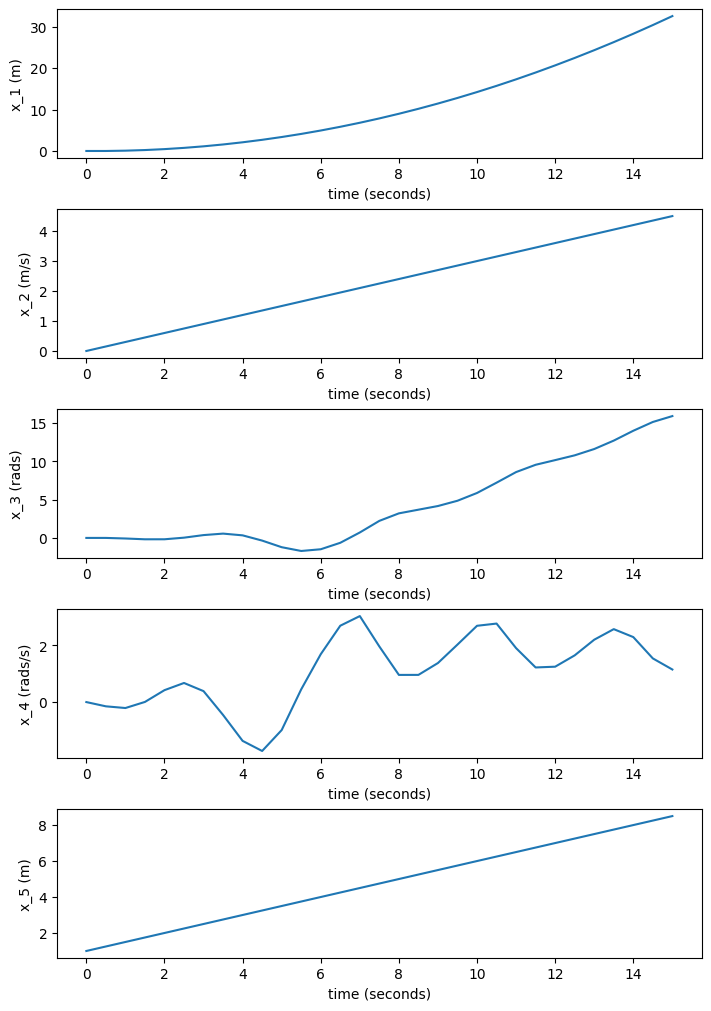

In [8]:
crane(0, 0, 0, 0, 1, .3, .5, 15, .5)

Increasing the acceleration of the cart makes the cart go further. As for the angular position, when the cart reaches a certain speed, it no longer swings back and forth, but keeps getting dragged back further, with the angular velocity staying positive and never going back negative. 

x_1 : 0
x_2: 0
x_3: 0
x_4: 0
x_5: 1
Input 1: 0.05
Input 2: 1
Simulation length: 15 seconds
Delta t:  0.5


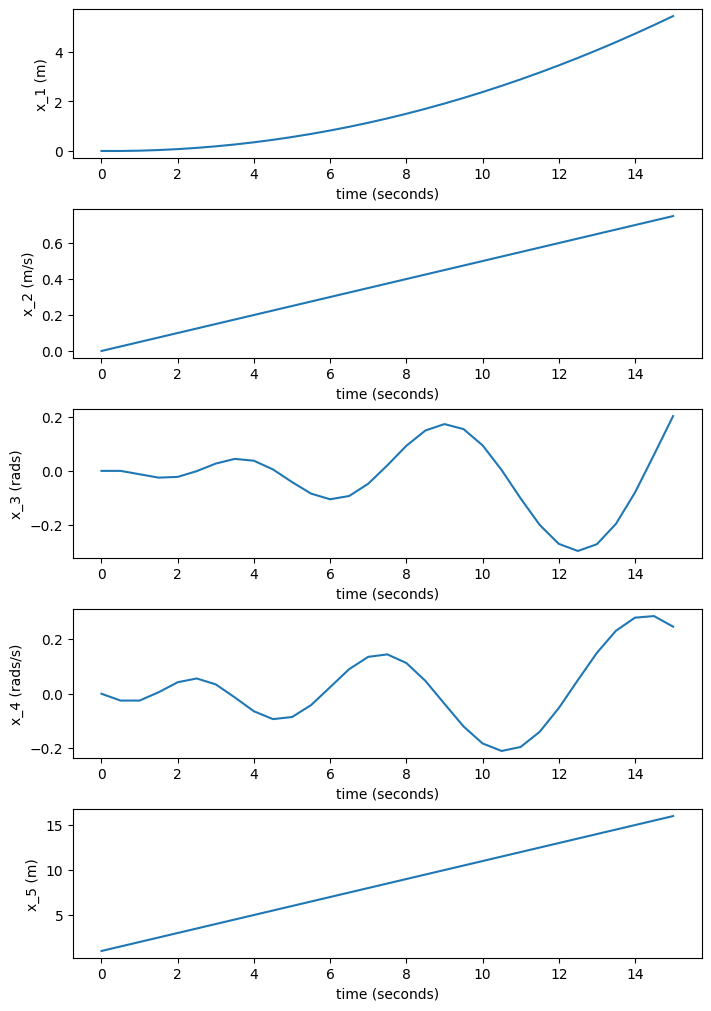

In [9]:
crane(0, 0, 0, 0, 1, .05, 1, 15, .5)

Increasing the rate of change of the cable doesn't effect the carts position or its velocity. However, increasing it does greatly reduce the angular position and angular velocity. Doubling the rate of change of the cable creates a maximum angular position of about .02 radians after 15 seconds than the previous 3 radians. The angular velocity follows a similar pattern.

x_1 : 0
x_2: 0
x_3: 0
x_4: 0
x_5: 1
Input 1: -0.05
Input 2: 0.5
Simulation length: 15 seconds
Delta t:  0.5


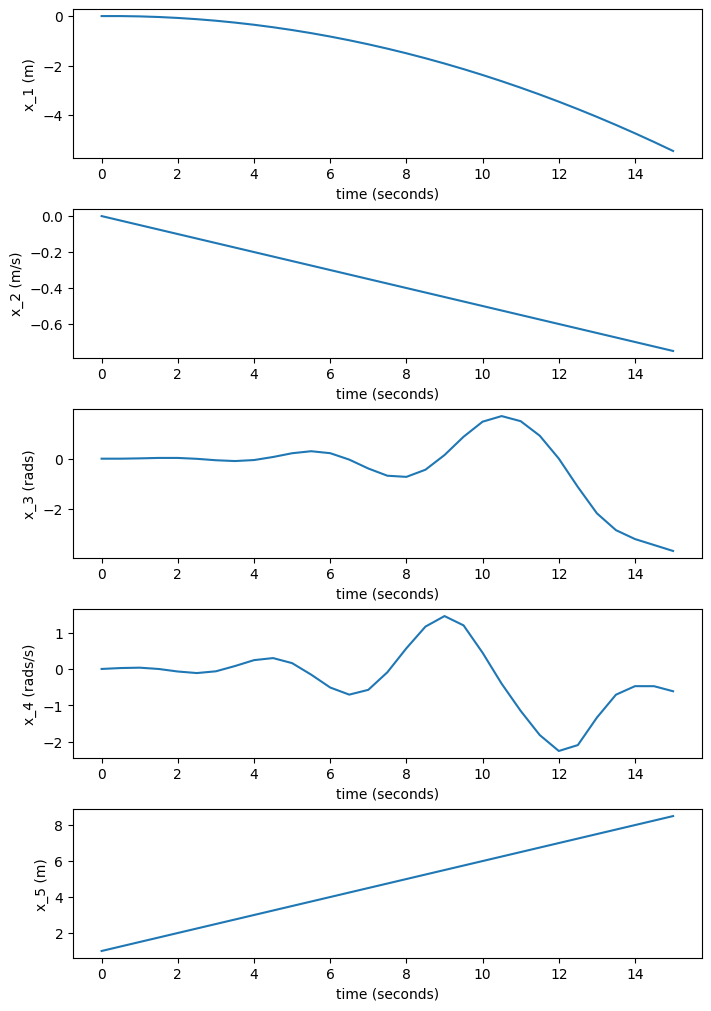

In [10]:
crane(0, 0, 0, 0, 1, -.05, .5, 15, .5)

Making the acceleration negative makes the cart move to the left, and flips the graphs for the angular position and angular velocity.

x_1 : 0
x_2: 0
x_3: 0
x_4: 0
x_5: 1
Input 1: 0.3
Input 2: 1
Simulation length: 15 seconds
Delta t:  0.5


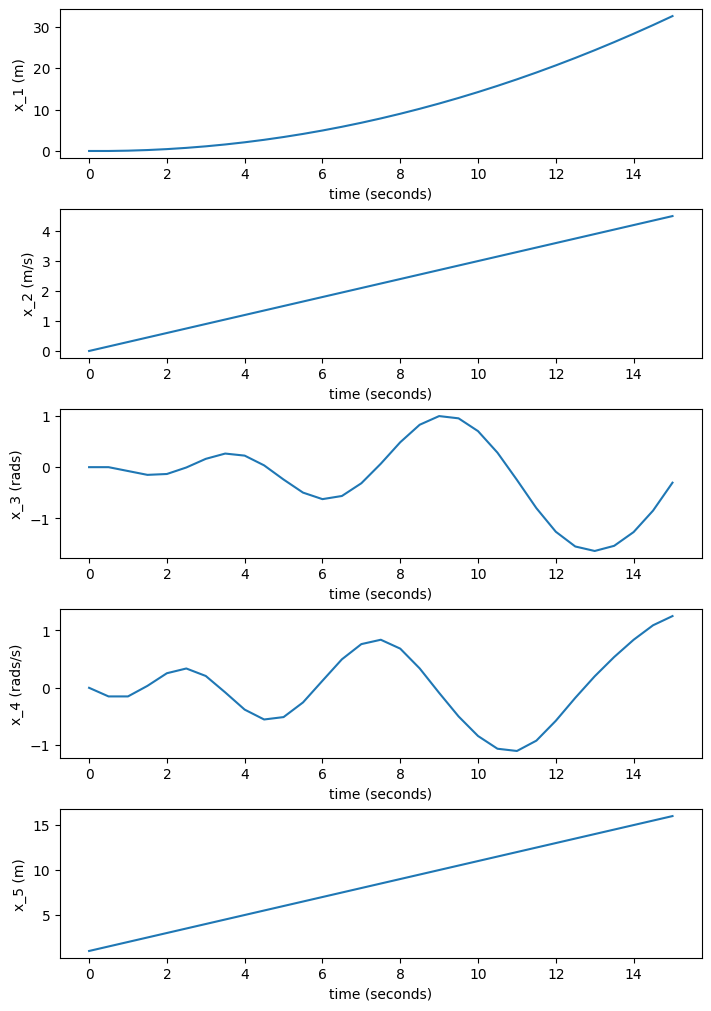

In [11]:
crane(0, 0, 0, 0, 1, .3, 1, 15, .5)

Increasing both the acceration and the rate of change of the cable show the two inputs working together. The increased rate of change still makes the angular position and velocity smaller, but the increased acceleration increases the values by a substantial amount compared to a slower accerleration.

# Section 5 - Controllers

## PID Controllers




In [12]:
#Saturate function for the PID implementation
def saturate(signal, saturation_level):
    # apply the upper-bound for saturation
    if signal > saturation_level:
        output = saturation_level
    # apply the lower-bound for saturation
    elif signal < -saturation_level:
        output = -saturation_level
    # do not change the signal in other cases
    else:
        output = signal
    return output

Ess1 (m): 0.005793726438156455
Percentage of overshoot: -0.06 %
Peak time: 10.01 seconds
Ess2 (m): 0.00038465581443070107
Percentage of overshoot: -0.00 %
Peak time: 10.01 seconds


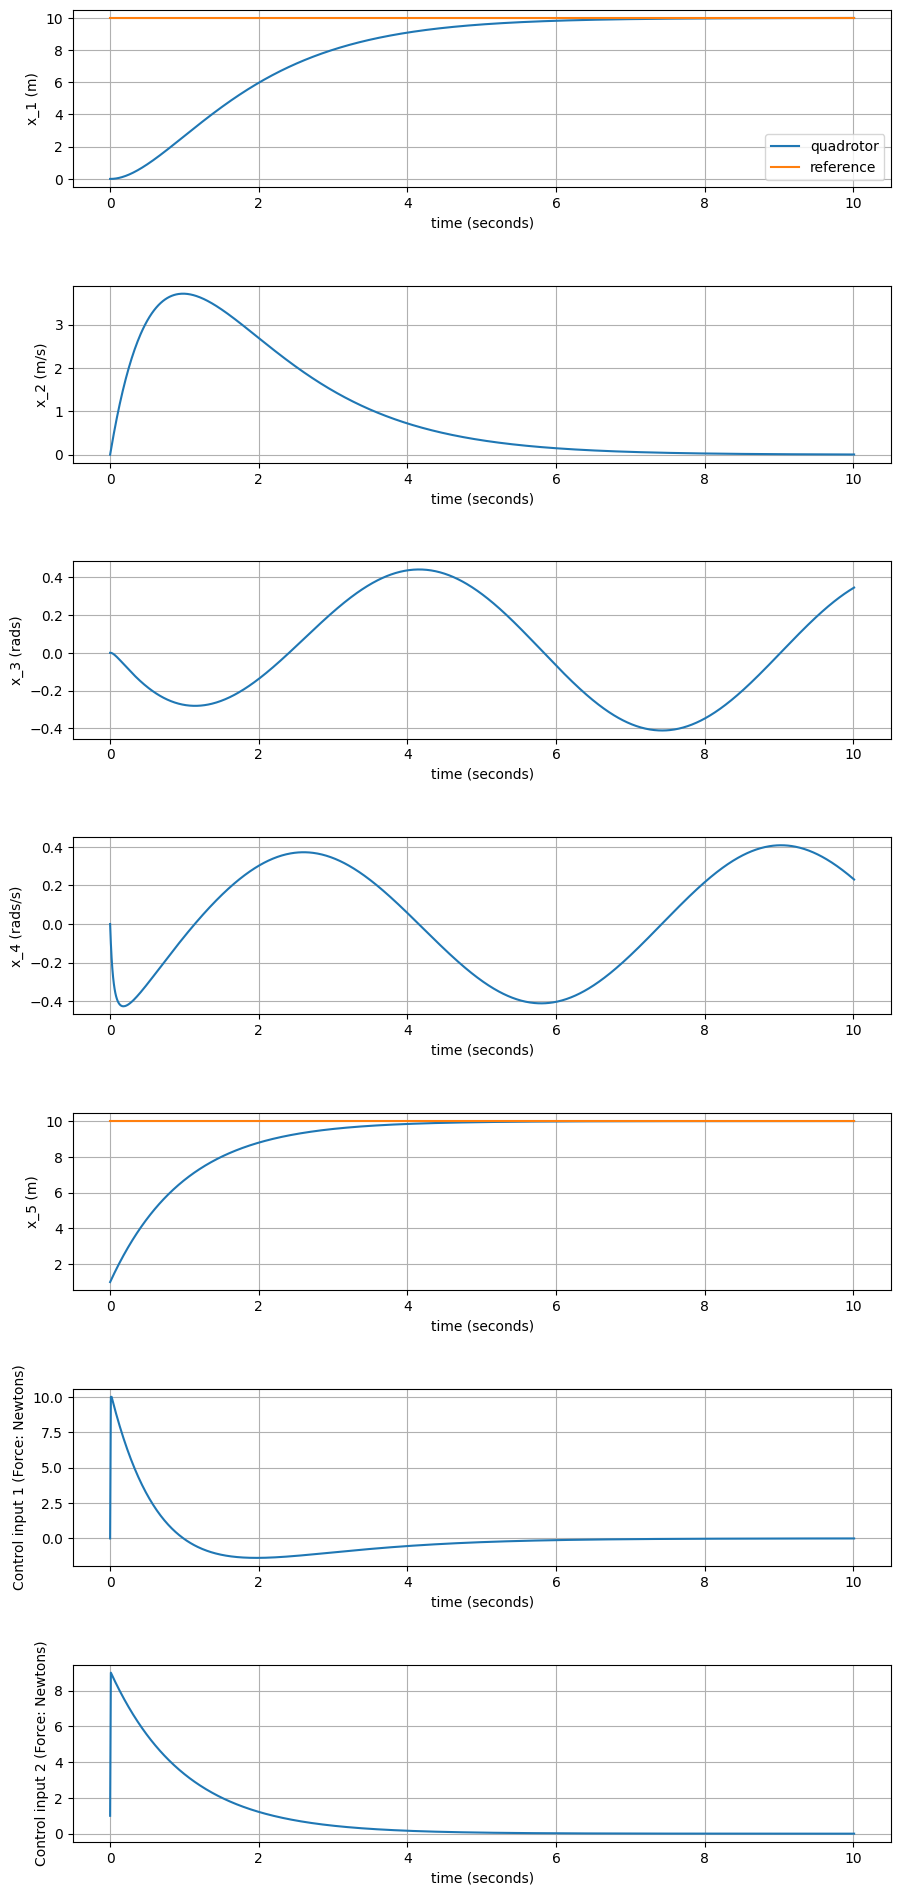

In [13]:
x_1 = 0 # meters
x_2 = 0 # m/s
x_3 = 0 # radians
x_4 = 0 # radians/s
x_5 = 1 # meters
u_1 = 0 # m/s^2 (keep accelerating the cart)
u_2 = 1 # meters(keep extending the length of the cable)
g = 9.8 # m/s^2
# states
x_d1 = 10 # desired/target position (meters) 
x_d5 = 10 # second desired/target position (meters)
t_0 = 0 # seconds
t_f = 10 # seconds
dt = 0.01 # delta t = 0.01 second
# variable for tracking the states
x_1_values = np.array([[x_1]])
x_2_values = np.array([[x_2]])
x_3_values = np.array([[x_3]])
x_4_values = np.array([[x_4]])
x_5_values = np.array([[x_5]])
ref_values1 = np.array([[x_d1]])
ref_values2 = np.array([[x_d5]])
time_values = np.array([[t_0]])
u1_values = np.array([[u_1]])
u2_values = np.array([[u_2]])

# initialize the solver
x_1k = x_1
x_2k = x_2
x_3k = x_3
x_4k = x_4
x_5k = x_5
u_1k = u_1
u_2k = u_2
t = t_0
# TODO: Initialize the controllers and define the gains
force_max = 10 # Newtons
e1_prev = 0 # initial value of error used in the derivative control
e1_int = 0 # initial value of integral of error used in the integral control
K1_p = 1 # P control gain 
K1_d = 2 # D control gain 
K1_i = 0  # I control gain 
e2_prev = 0 # initial value of error used in the derivative control
e2_int = 0 # initial value of integral of error used in the integral control
K2_p = 1 # P control gain 
K2_d = 0 # D control gain 
K2_i = 0  # I control gain 
# simulate the system
while t < t_f:
    # calculate the force
    e1_k = x_d1 - x_1k # the first state is the position
    e1_dot = (e1_k - e1_prev)/dt
    # update the previous value for the next loop
    e1_prev = e1_k
    #print(e_dot)
    e1_int += e1_k*dt
    #print(e_int)
    force1 = K1_p*e1_k + K1_i*e1_int + K1_d*e1_dot
    
    e2_k = x_d5 - x_5k # the first state is the position
    e2_dot = (e2_k - e2_prev)/dt
    # update the previous value for the next loop
    e2_prev = e2_k
    #print(e_dot)
    e2_int += e2_k*dt
    #print(e_int)
    force2 = K2_p*e2_k + K2_i*e2_int + K2_d*e2_dot
    
    # dynamic model 
    force1 = saturate(force1, force_max)
    force2 = saturate(force2, force_max)
    u_1k = force1
    u_2k = force2
    # update the states x_1{k+1}
    x_1k1 = x_2k * dt + x_1k
    # update the states x_2{k+1}
    x_2k1 = u_1k * dt + x_2k
    # update the states x_3{k+1}
    x_3k1 = x_4k * dt + x_3k
    # update the states x_4{k+1}
    x_4k1 = (dt/x_5k) * (-g * math.sin(x_3k) - math.cos(x_3k) * u_1k - (2 * x_4k * u_2k)) + x_4k
    # update the states x_5{k+1}
    x_5k1 = u_2k * dt + x_5k
    # update the simulation time stamp
    t += dt
    # update the arrays
    x_1_values = np.append(x_1_values, np.array([[x_1k1]]),axis = 0)
    x_2_values = np.append(x_2_values, np.array([[x_2k1]]),axis = 0)
    x_3_values = np.append(x_3_values, np.array([[x_3k1]]),axis = 0)
    x_4_values = np.append(x_4_values, np.array([[x_4k1]]),axis = 0)
    x_5_values = np.append(x_5_values, np.array([[x_5k1]]),axis = 0)
    ref_values1= np.append(ref_values1, np.array([[x_d1]]),axis = 0)
    ref_values2= np.append(ref_values2, np.array([[x_d5]]),axis = 0)
    u1_values = np.append(u1_values, np.array([[u_1k]]),axis = 0)
    u2_values = np.append(u2_values, np.array([[u_2k]]),axis = 0)
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    # set up the loop for the next iteration
    x_1k = x_1k1
    x_2k = x_2k1
    x_3k = x_3k1
    x_4k = x_4k1
    x_5k = x_5k1

# estimate the steady-state error
e1_ss = x_d1 - x_1k
print('Ess1 (m):',e1_ss)
# estimate the overshoot
OS = (np.max(x_1_values)-x_d1)/x_d1*100
print('Percentage of overshoot:',format(OS,'.2f'),'\b%')
# estimate the peak time
tp1 = np.argmax(x_1_values)*dt
print('Peak time:',tp1,'seconds')
e2_ss = x_d5 - x_5k
print('Ess2 (m):',e2_ss)
# estimate the overshoot
OS = (np.max(x_5_values)-x_d5)/x_d5*100
print('Percentage of overshoot:',format(OS,'.2f'),'\b%')
# estimate the peak time
tp2 = np.argmax(x_5_values)*dt
print('Peak time:',tp2,'seconds')
fig, axs = plt.subplots(7, 1,figsize=(10, 20))
# plot the first state vs time
fig.tight_layout(pad=5.0)
# plot the 1st state vs time
axs[0].plot(time_values, x_1_values)
axs[0].plot(time_values, ref_values1)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('x_1 (m)')
axs[0].grid()   
axs[0].legend(['quadrotor', 'reference'])
# plot the 2nd state vs time
axs[1].plot(time_values, x_2_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('x_2 (m/s)')
axs[1].grid()   
# plot the 3rd state vs time
axs[2].plot(time_values, x_3_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('x_3 (rads)')
axs[2].grid()  
# plot the 4th state vs time
axs[3].plot(time_values, x_4_values)
axs[3].set_xlabel('time (seconds)')
axs[3].set_ylabel('x_4 (rads/s)')
axs[3].grid()   
# plot the 5th state vs time
axs[4].plot(time_values, x_5_values)
axs[4].plot(time_values, ref_values2)
axs[4].set_xlabel('time (seconds)')
axs[4].set_ylabel('x_5 (m)')
axs[4].grid()   
# plot the first input vs time
axs[5].plot(time_values, u1_values)
axs[5].set_xlabel('time (seconds)')
axs[5].set_ylabel('Control input 1 (Force: Newtons)')
axs[5].grid()
# plot the second input vs time
axs[6].plot(time_values, u2_values)
axs[6].set_xlabel('time (seconds)')
axs[6].set_ylabel('Control input 2 (Force: Newtons)')
axs[6].grid()

Ess1 (m): -0.013014322163542147
Percentage of overshoot: -100.00 %
Peak time: 0.0 seconds
Ess2 (m): 0.0006388839945632441
Percentage of overshoot: -0.00 %
Peak time: 10.01 seconds


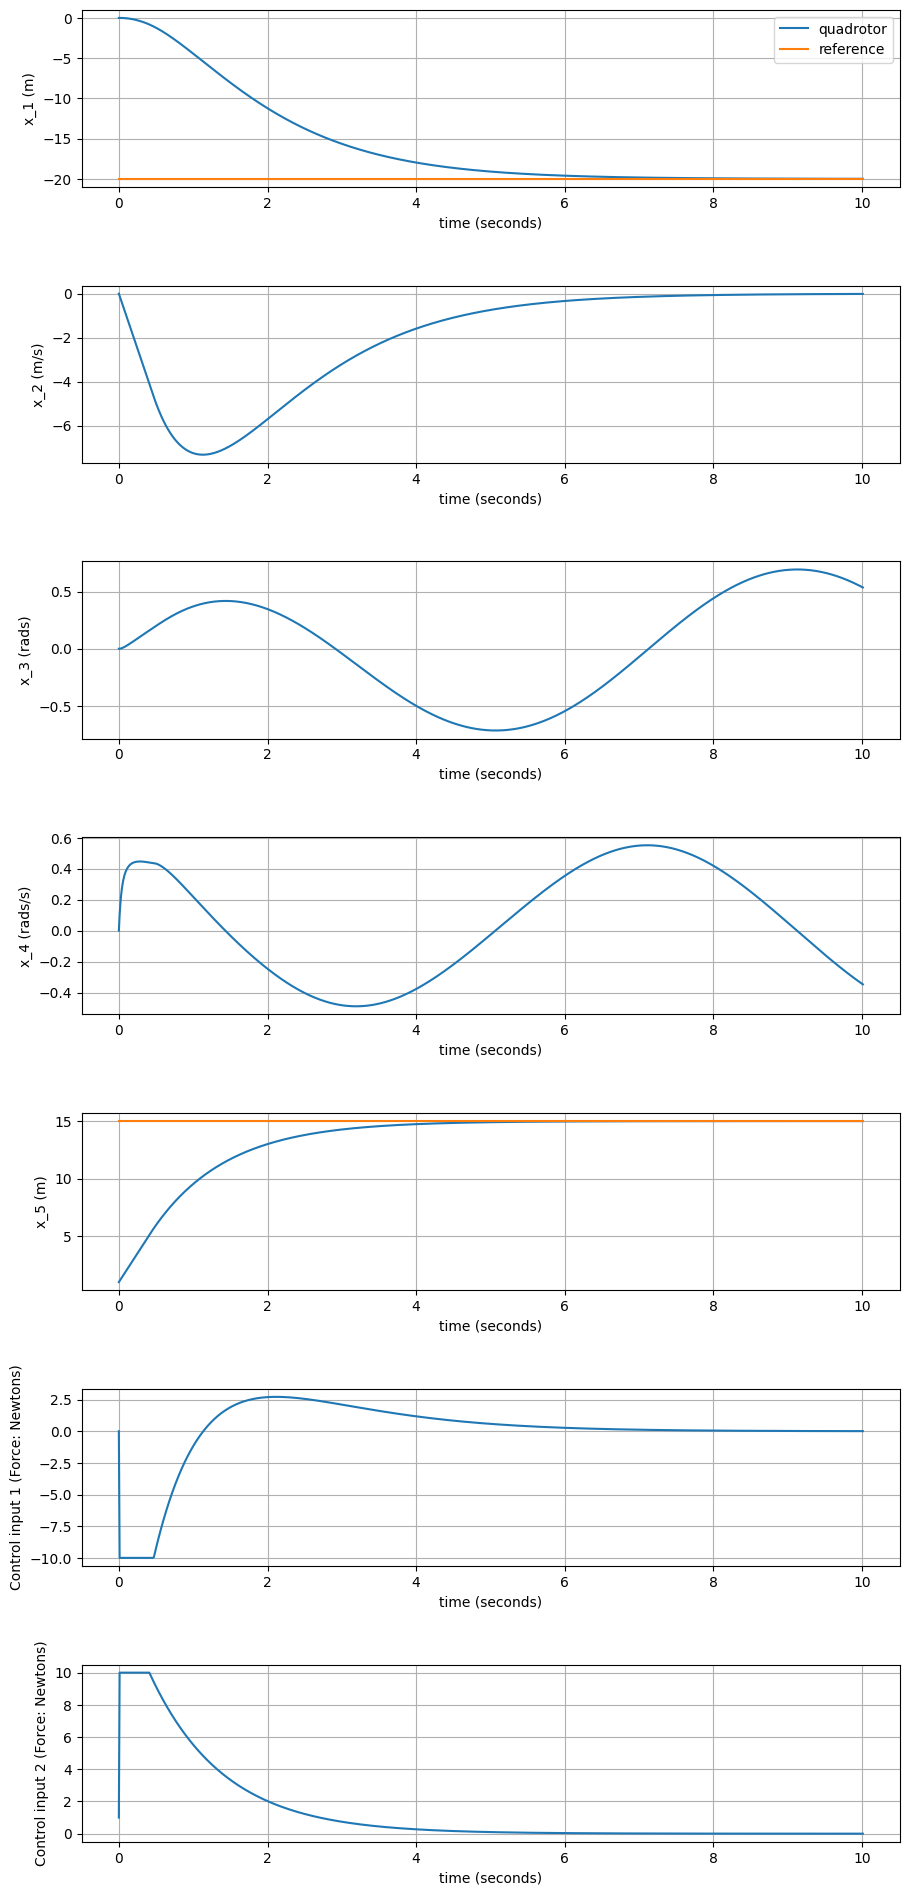

In [14]:
x_1 = 0 # meters
x_2 = 0 # m/s
x_3 = 0 # radians
x_4 = 0 # radians/s
x_5 = 1 # meters
u_1 = 0 # m/s^2 (keep accelerating the cart)
u_2 = 1 # meters(keep extending the length of the cable)
g = 9.8 # m/s^2
# states
x_d1 = -20 # desired/target position (meters) 
x_d5 = 15 # second desired/target position (meters)
t_0 = 0 # seconds
t_f = 10 # seconds
dt = 0.01 # delta t = 0.01 second
# variable for tracking the states
x_1_values = np.array([[x_1]])
x_2_values = np.array([[x_2]])
x_3_values = np.array([[x_3]])
x_4_values = np.array([[x_4]])
x_5_values = np.array([[x_5]])
ref_values1 = np.array([[x_d1]])
ref_values2 = np.array([[x_d5]])
time_values = np.array([[t_0]])
u1_values = np.array([[u_1]])
u2_values = np.array([[u_2]])

# initialize the solver
x_1k = x_1
x_2k = x_2
x_3k = x_3
x_4k = x_4
x_5k = x_5
u_1k = u_1
u_2k = u_2
t = t_0
# TODO: Initialize the controllers and define the gains
force_max = 10 # Newtons
e1_prev = 0 # initial value of error used in the derivative control
e1_int = 0 # initial value of integral of error used in the integral control
K1_p = 1 # P control gain 
K1_d = 2 # D control gain 
K1_i = 0  # I control gain 
e2_prev = 0 # initial value of error used in the derivative control
e2_int = 0 # initial value of integral of error used in the integral control
K2_p = 1 # P control gain 
K2_d = 0 # D control gain 
K2_i = 0  # I control gain 
# simulate the system
while t < t_f:
    # calculate the force
    e1_k = x_d1 - x_1k # the first state is the position
    e1_dot = (e1_k - e1_prev)/dt
    # update the previous value for the next loop
    e1_prev = e1_k
    #print(e_dot)
    e1_int += e1_k*dt
    #print(e_int)
    force1 = K1_p*e1_k + K1_i*e1_int + K1_d*e1_dot
    
    e2_k = x_d5 - x_5k # the first state is the position
    e2_dot = (e2_k - e2_prev)/dt
    # update the previous value for the next loop
    e2_prev = e2_k
    #print(e_dot)
    e2_int += e2_k*dt
    #print(e_int)
    force2 = K2_p*e2_k + K2_i*e2_int + K2_d*e2_dot
    
    # dynamic model 
    force1 = saturate(force1, force_max)
    force2 = saturate(force2, force_max)
    u_1k = force1
    u_2k = force2
    # update the states x_1{k+1}
    x_1k1 = x_2k * dt + x_1k
    # update the states x_2{k+1}
    x_2k1 = u_1k * dt + x_2k
    # update the states x_3{k+1}
    x_3k1 = x_4k * dt + x_3k
    # update the states x_4{k+1}
    x_4k1 = (dt/x_5k) * (-g * math.sin(x_3k) - math.cos(x_3k) * u_1k - (2 * x_4k * u_2k)) + x_4k
    # update the states x_5{k+1}
    x_5k1 = u_2k * dt + x_5k
    # update the simulation time stamp
    t += dt
    # update the arrays
    x_1_values = np.append(x_1_values, np.array([[x_1k1]]),axis = 0)
    x_2_values = np.append(x_2_values, np.array([[x_2k1]]),axis = 0)
    x_3_values = np.append(x_3_values, np.array([[x_3k1]]),axis = 0)
    x_4_values = np.append(x_4_values, np.array([[x_4k1]]),axis = 0)
    x_5_values = np.append(x_5_values, np.array([[x_5k1]]),axis = 0)
    ref_values1= np.append(ref_values1, np.array([[x_d1]]),axis = 0)
    ref_values2= np.append(ref_values2, np.array([[x_d5]]),axis = 0)
    u1_values = np.append(u1_values, np.array([[u_1k]]),axis = 0)
    u2_values = np.append(u2_values, np.array([[u_2k]]),axis = 0)
    time_values= np.append(time_values, np.array([[t]]),axis = 0)
    # set up the loop for the next iteration
    x_1k = x_1k1
    x_2k = x_2k1
    x_3k = x_3k1
    x_4k = x_4k1
    x_5k = x_5k1

# estimate the steady-state error
e1_ss = x_d1 - x_1k
print('Ess1 (m):',e1_ss)
# estimate the overshoot
OS = (np.max(x_1_values)-x_d1)/x_d1*100
print('Percentage of overshoot:',format(OS,'.2f'),'\b%')
# estimate the peak time
tp1 = np.argmax(x_1_values)*dt
print('Peak time:',tp1,'seconds')
e2_ss = x_d5 - x_5k
print('Ess2 (m):',e2_ss)
# estimate the overshoot
OS = (np.max(x_5_values)-x_d5)/x_d5*100
print('Percentage of overshoot:',format(OS,'.2f'),'\b%')
# estimate the peak time
tp2 = np.argmax(x_5_values)*dt
print('Peak time:',tp2,'seconds')
fig, axs = plt.subplots(7, 1,figsize=(10, 20))
# plot the first state vs time
fig.tight_layout(pad=5.0)
# plot the 1st state vs time
axs[0].plot(time_values, x_1_values)
axs[0].plot(time_values, ref_values1)
axs[0].set_xlabel('time (seconds)')
axs[0].set_ylabel('x_1 (m)')
axs[0].grid()   
axs[0].legend(['quadrotor', 'reference'])
# plot the 2nd state vs time
axs[1].plot(time_values, x_2_values)
axs[1].set_xlabel('time (seconds)')
axs[1].set_ylabel('x_2 (m/s)')
axs[1].grid()   
# plot the 3rd state vs time
axs[2].plot(time_values, x_3_values)
axs[2].set_xlabel('time (seconds)')
axs[2].set_ylabel('x_3 (rads)')
axs[2].grid()  
# plot the 4th state vs time
axs[3].plot(time_values, x_4_values)
axs[3].set_xlabel('time (seconds)')
axs[3].set_ylabel('x_4 (rads/s)')
axs[3].grid()   
# plot the 5th state vs time
axs[4].plot(time_values, x_5_values)
axs[4].plot(time_values, ref_values2)
axs[4].set_xlabel('time (seconds)')
axs[4].set_ylabel('x_5 (m)')
axs[4].grid()   
# plot the first input vs time
axs[5].plot(time_values, u1_values)
axs[5].set_xlabel('time (seconds)')
axs[5].set_ylabel('Control input 1 (Force: Newtons)')
axs[5].grid()
# plot the second input vs time
axs[6].plot(time_values, u2_values)
axs[6].set_xlabel('time (seconds)')
axs[6].set_ylabel('Control input 2 (Force: Newtons)')
axs[6].grid()

# Section 6 - Conclusion

We learned that each of the initial conditions and inputs effect the graphs in different ways. Unless the initial velocity of the cart is set to a very high value, it only really effects the position of the cart and the velocity, but doesn't have too great of an effect on the angular position or velocity. The initial conditions for the length of the rope, angular position, and angular velocity don't effect the velocity or position of the cart, but have large effects on the angular position and velocity. The regular dynamic system is unstable as each output graph will eventually go to infinity if it is allowed to. The PID controller system fixes this problem by stopping the system when it reaches the target values and creates a stable system with the correct PID values. 